# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [164]:
# Empty list for holding the latitude and longitude combinations
latitude_longitude_list = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

# Create a set of random lat and lng combinations
latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
latitude_longitude_list = zip(latitude, longitude)

# Identify nearest city for each lat, lng combination
for coordinates in latitude_longitude_list:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [167]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'{url}appid={weather_api_key}&q={city}&units=metric')
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitude = city_weather['coord']['lon']
        city_longitude = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_latitude, 
                          "Longitude": city_longitude, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print('-'*29)
print("Data Retrieval Complete")
print('-'*29)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | lakatoro
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | cutral-co
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | i-n-salah
Processing Record 10 of Set 1 | greymouth
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | live oak
Processing Record 14 of Set 1 | fada
Processing Record 15 of Set 1 | opuwo
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | khovd
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | harrisburg
Processing Record 21 of Set 1 | urangan
Processing Record 22 of Set 1 | bilibino
Processing Record 23 of Set 1 | nouadh

In [168]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Latitude      555
Longitude     555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [169]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,-79.2353,42.0970,17.80,84,100,1.54,US,1683506202
1,lakatoro,167.4164,-16.0999,28.20,72,25,1.80,VU,1683506203
2,vilyuchinsk,158.4028,52.9306,10.15,72,33,1.92,RU,1683506203
3,cutral-co,-69.2089,-38.9469,12.17,34,0,4.47,AR,1683506203
4,touros,-35.4608,-5.1989,26.44,80,13,5.61,BR,1683505928


In [170]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [171]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,-79.2353,42.0970,17.80,84,100,1.54,US,1683506202
1,lakatoro,167.4164,-16.0999,28.20,72,25,1.80,VU,1683506203
2,vilyuchinsk,158.4028,52.9306,10.15,72,33,1.92,RU,1683506203
3,cutral-co,-69.2089,-38.9469,12.17,34,0,4.47,AR,1683506203
4,touros,-35.4608,-5.1989,26.44,80,13,5.61,BR,1683505928


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

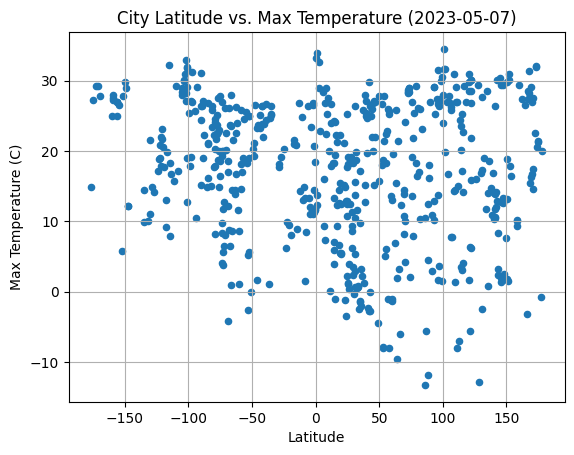

In [172]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Latitude', y='Max Temp', grid=True, title='City Latitude vs. Max Temperature (2023-05-07)')

# Incorporate the other graph properties
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

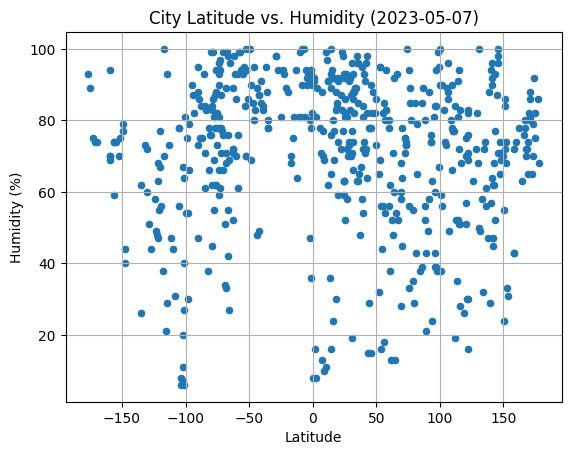

In [173]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Latitude', y='Humidity', grid=True, title='City Latitude vs. Humidity (2023-05-07)')

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

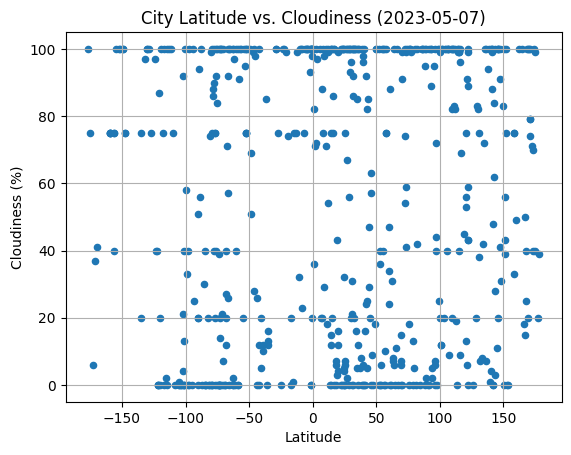

In [174]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Latitude', y='Cloudiness', grid=True, title='City Latitude vs. Cloudiness (2023-05-07)')

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

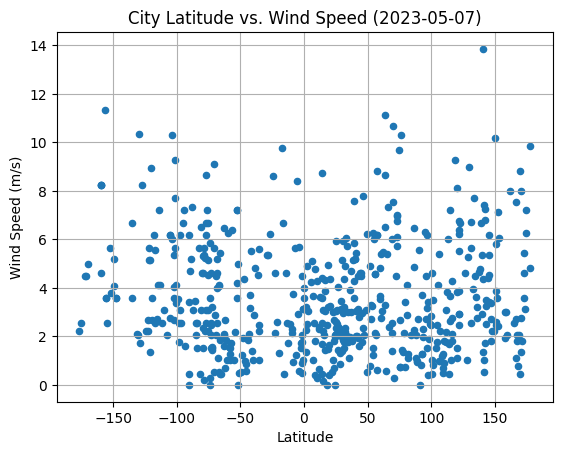

In [175]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Latitude', y='Wind Speed', grid=True, title='City Latitude vs. Wind Speed (2023-05-07)')

# Incorporate the other graph properties
plt.ylabel('Wind Speed (m/s)')

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [187]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(0,0),fontsize=15,color="red")
    print(f'The r-value is: {rvalue**2}')
    plt.show()


In [177]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lakatoro,167.4164,-16.0999,28.20,72,25,1.80,VU,1683506203
2,vilyuchinsk,158.4028,52.9306,10.15,72,33,1.92,RU,1683506203
8,i-n-salah,2.4607,27.1935,32.66,8,100,4.91,DZ,1683506203
9,greymouth,171.2000,-42.4667,17.43,86,79,1.80,NZ,1683506073
10,blackmans bay,147.3167,-43.0167,12.63,71,91,3.36,AU,1683506204


In [178]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df =city_data_df.loc[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,-79.2353,42.0970,17.80,84,100,1.54,US,1683506202
3,cutral-co,-69.2089,-38.9469,12.17,34,0,4.47,AR,1683506203
4,touros,-35.4608,-5.1989,26.44,80,13,5.61,BR,1683505928
5,isafjordur,-23.1240,66.0755,6.17,94,100,2.14,IS,1683506203
6,bethel,-73.4140,41.3712,20.05,59,0,4.63,US,1683506203


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.018019648857781265


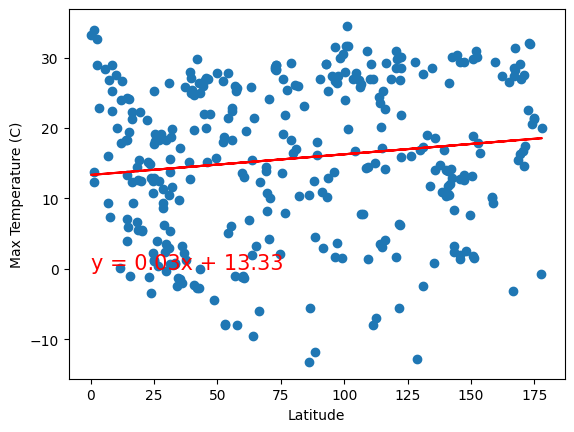

In [179]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
linear_regression(x_values, y_values)


The r-value is: 0.07118074302123108


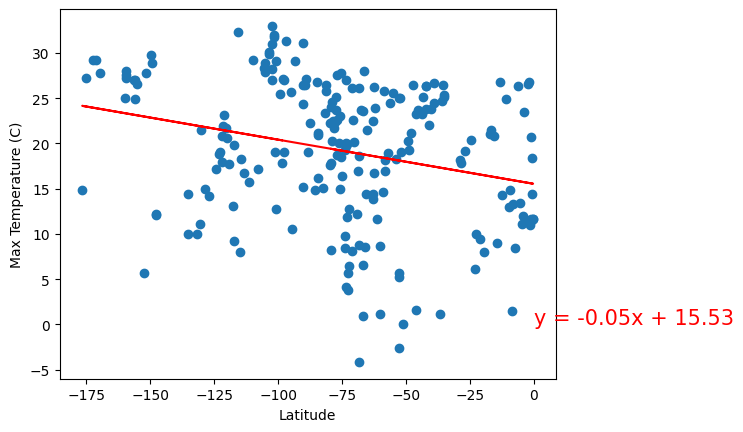

In [180]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0021312700347447307


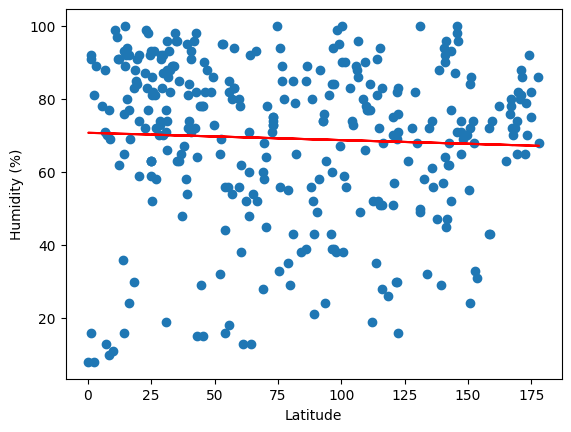

In [181]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
linear_regression(x_values, y_values)

The r-value is: 0.13319831620914555


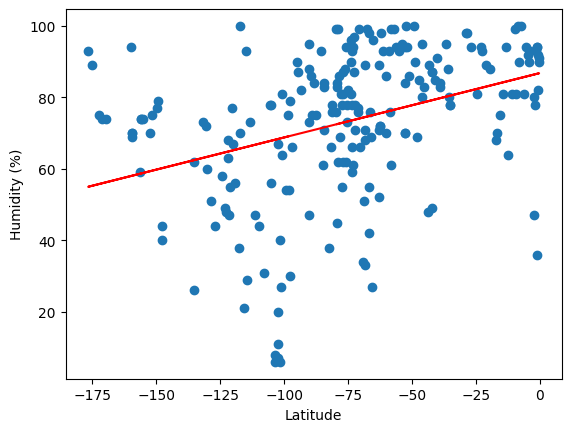

In [182]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0063332793836031595


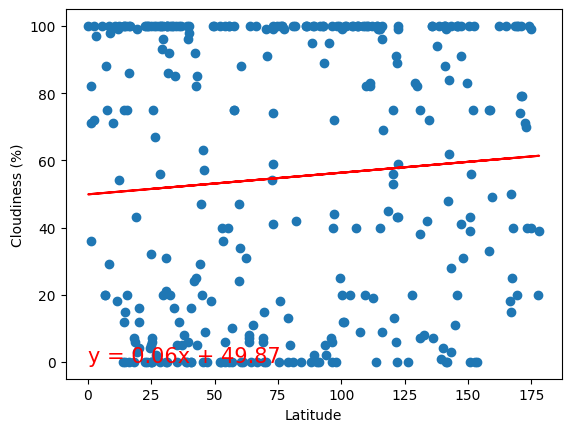

In [183]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
linear_regression(x_values, y_values)

The r-value is: 0.005438588103873718


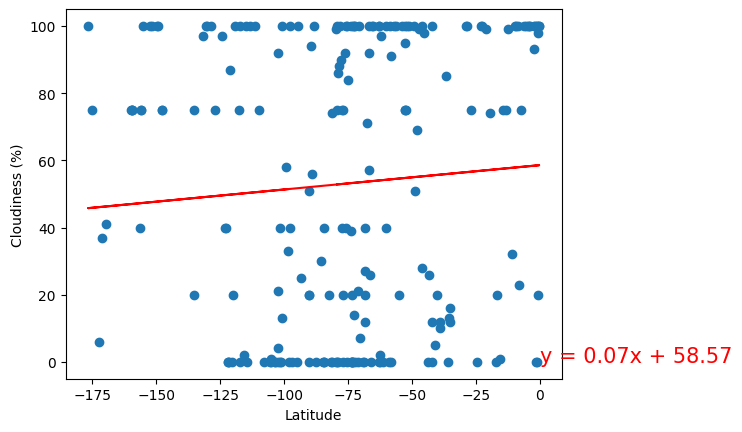

In [184]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.031205897462449086


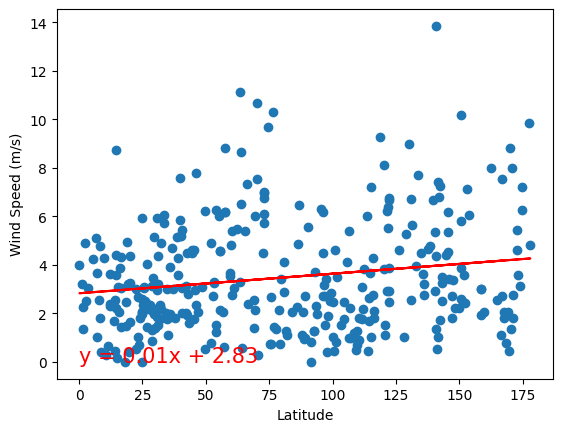

In [185]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
linear_regression(x_values, y_values)

The r-value is: 0.06772467202030899


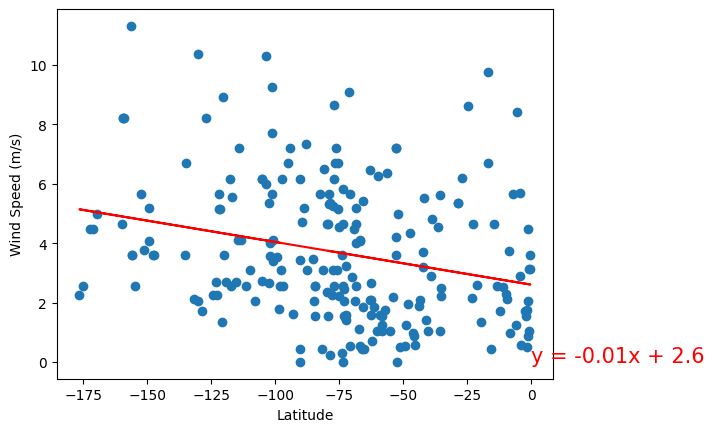

In [186]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE